In [1]:
import time
import math
import numpy as np
import pandas as pd
from scipy.stats import circmean
import matplotlib.pyplot as plt

import sqlite3
con = sqlite3.connect('../summer')
cur = con.cursor()

In [2]:
students = ['\'Alonzo\'','\'Dax\'','\'Emily\'','\'Isabelle\'','\'Jake\'','\'Philip\'','\'Rishab\'','\'Sam\'',
            '\'justin\'','\'Alex\'','\'Jordan\'']
recordings_train = ['\'week1_3\'', '\'week2_3\'', '\'week3_3\'', '\'week4_3\'', '\'week5_3\'', '\'week6_3\'']
recordings_test = ['\'week7_3\'', '\'week8_3\'']

all_weeks_train = pd.read_sql_query("""SELECT PlayerName, RecordingName,
    HeadPos_x, HeadPos_y, HeadPos_z, 
    LeftHandPos_x, LeftHandPos_y, LeftHandPos_z,
    RightHandPos_x, RightHandPos_y, RightHandPos_z,
    HeadRot_w, HeadRot_x, HeadRot_y, HeadRot_z,
    LeftHandRot_w, LeftHandRot_x, LeftHandRot_y, LeftHandRot_z,
    RightHandRot_w, RightHandRot_x, RightHandRot_y, RightHandRot_z
    FROM PersonTime
    WHERE PlayerName IN ({})
    AND RecordingName IN ({})
    """.format(",".join(students), ",".join(recordings_train)), con)

all_weeks_test = pd.read_sql_query("""SELECT PlayerName, RecordingName,
    HeadPos_x, HeadPos_y, HeadPos_z, 
    LeftHandPos_x, LeftHandPos_y, LeftHandPos_z,
    RightHandPos_x, RightHandPos_y, RightHandPos_z,
    HeadRot_w, HeadRot_x, HeadRot_y, HeadRot_z,
    LeftHandRot_w, LeftHandRot_x, LeftHandRot_y, LeftHandRot_z,
    RightHandRot_w, RightHandRot_x, RightHandRot_y, RightHandRot_z
    FROM PersonTime
    WHERE PlayerName IN ({})
    AND RecordingName IN ({})
    """.format(",".join(students), ",".join(recordings_test)), con)

print(all_weeks_train.shape)
print(all_weeks_test.shape)

(3189974, 23)
(919446, 23)


In [22]:
playernames_train = all_weeks_train['PlayerName'].unique()

for playername in playernames_train:
    player_df = all_weeks_train[all_weeks_train['PlayerName'] == playername]
    
    print(playername, player_df.shape[0])

Alonzo 329847
Dax 350770
Emily 322056
Isabelle 229811
Jake 347650
Philip 341369
Rishab 254938
Sam 198093
justin 354633
Alex 246942
Jordan 213865


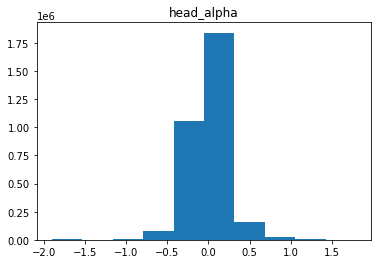

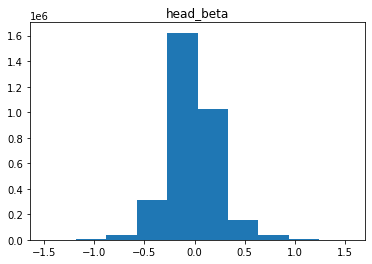

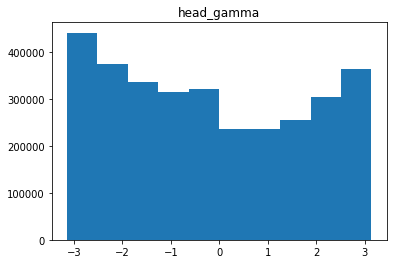

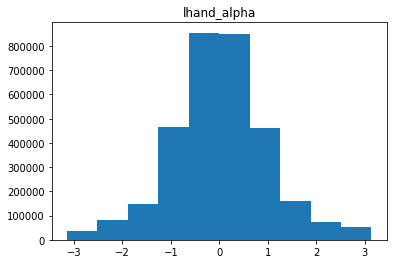

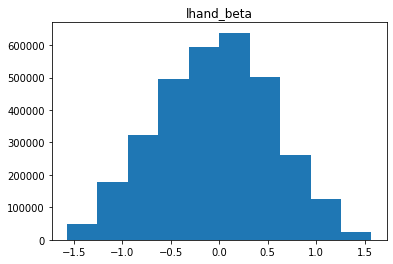

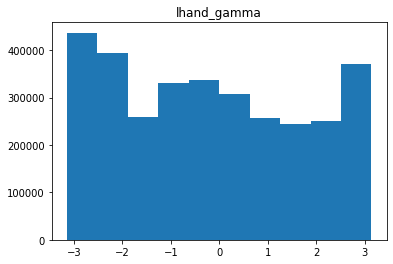

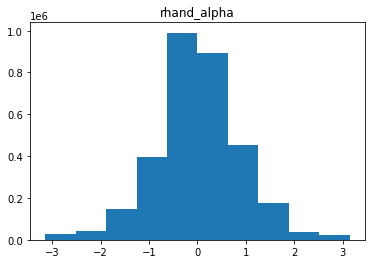

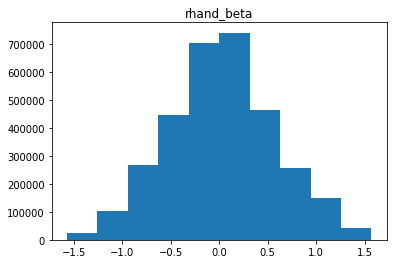

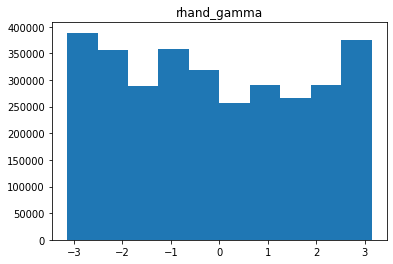

In [3]:
translations = ['HeadPos_y', 'LeftHandPos_y', 'RightHandPos_y']

playernames_train = all_weeks_train['PlayerName'].unique()
recordingnames_train = all_weeks_train['RecordingName'].unique()

playerIdx = {
    'Alonzo': 0,
    'Dax': 1,
    'Emily': 2,
    'Isabelle': 3,
    'Jake': 4,
    'Philip': 5,
    'Rishab': 6,
    'Sam': 7,
    'justin': 8,
    'Alex': 9,
    'Jordan': 10
}

X_train = []
y_train = []

head_q0, head_q1, head_q2, head_q3 = all_weeks_train['HeadRot_w'], all_weeks_train['HeadRot_x'], all_weeks_train['HeadRot_y'], all_weeks_train['HeadRot_z'], 
lhand_q0, lhand_q1, lhand_q2, lhand_q3 = all_weeks_train['LeftHandRot_w'], all_weeks_train['LeftHandRot_x'], all_weeks_train['LeftHandRot_y'], all_weeks_train['LeftHandRot_z'], 
rhand_q0, rhand_q1, rhand_q2, rhand_q3 = all_weeks_train['RightHandRot_w'], all_weeks_train['RightHandRot_x'], all_weeks_train['RightHandRot_y'], all_weeks_train['RightHandRot_z'], 

all_weeks_train['head_alpha'] = np.arctan2(2*(head_q0*head_q3-head_q1*head_q2), 1-2*(head_q3**2+head_q1**2))
all_weeks_train['head_beta'] = np.arcsin(2*(-head_q0*head_q1-head_q2*head_q3))
all_weeks_train['head_gamma'] = np.arctan2(2*(head_q0*head_q2-head_q3*head_q1), 1-2*(head_q1**2+head_q2**2))

all_weeks_train['lhand_alpha'] = np.arctan2(2*(lhand_q0*lhand_q3-lhand_q1*lhand_q2), 1-2*(lhand_q3**2+lhand_q1**2))
all_weeks_train['lhand_beta'] = np.arcsin(2*(-lhand_q0*lhand_q1-lhand_q2*lhand_q3))
all_weeks_train['lhand_gamma'] = np.arctan2(2*(lhand_q0*lhand_q2-lhand_q3*lhand_q1), 1-2*(lhand_q1**2+lhand_q2**2))

all_weeks_train['rhand_alpha'] = np.arctan2(2*(rhand_q0*rhand_q3-rhand_q1*rhand_q2), 1-2*(rhand_q3**2+rhand_q1**2))
all_weeks_train['rhand_beta'] = np.arcsin(2*(-rhand_q0*rhand_q1-rhand_q2*rhand_q3))
all_weeks_train['rhand_gamma'] = np.arctan2(2*(rhand_q0*rhand_q2-rhand_q3*rhand_q1), 1-2*(rhand_q1**2+rhand_q2**2))

euler_angles = ['head_alpha', 'head_beta', 'head_gamma', 
                'lhand_alpha', 'lhand_beta', 'lhand_gamma', 
                'rhand_alpha', 'rhand_beta', 'rhand_gamma']


for angle in euler_angles:
    plt.hist(all_weeks_train[angle])
    plt.title(angle)
    plt.show()

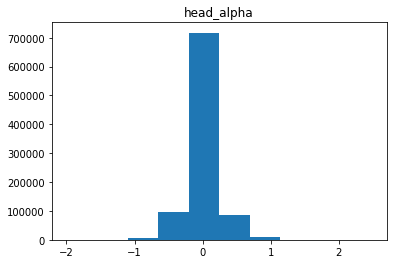

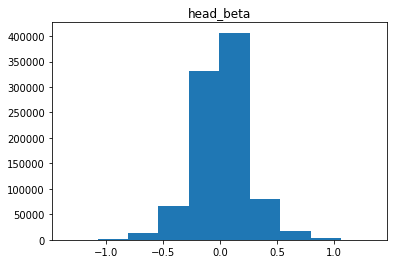

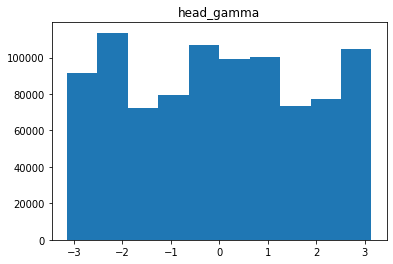

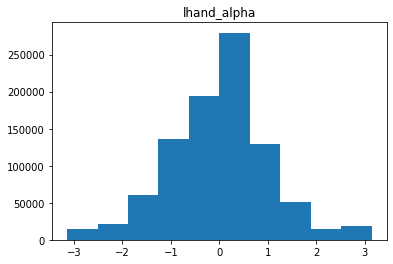

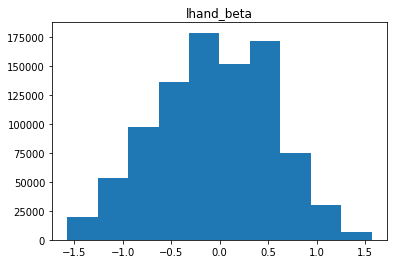

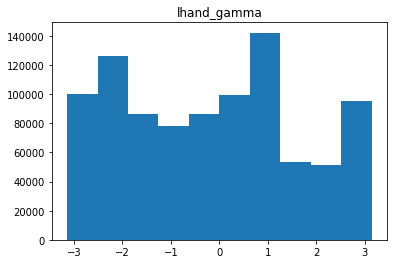

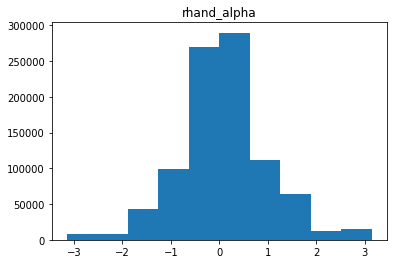

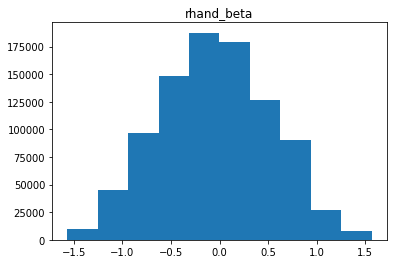

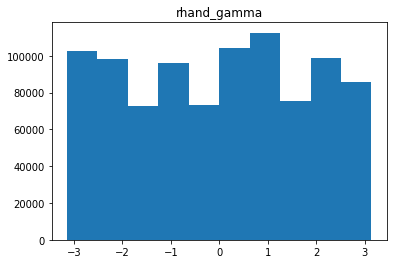

In [4]:
playernames_test = all_weeks_test['PlayerName'].unique()
recordingnames_test = all_weeks_test['RecordingName'].unique()

X_test = []
y_test = []

head_q0, head_q1, head_q2, head_q3 = all_weeks_test['HeadRot_w'], all_weeks_test['HeadRot_x'], all_weeks_test['HeadRot_y'], all_weeks_test['HeadRot_z'], 
lhand_q0, lhand_q1, lhand_q2, lhand_q3 = all_weeks_test['LeftHandRot_w'], all_weeks_test['LeftHandRot_x'], all_weeks_test['LeftHandRot_y'], all_weeks_test['LeftHandRot_z'], 
rhand_q0, rhand_q1, rhand_q2, rhand_q3 = all_weeks_test['RightHandRot_w'], all_weeks_test['RightHandRot_x'], all_weeks_test['RightHandRot_y'], all_weeks_test['RightHandRot_z'], 

all_weeks_test['head_alpha'] = np.arctan2(2*(head_q0*head_q3-head_q1*head_q2), 1-2*(head_q3**2+head_q1**2))
all_weeks_test['head_beta'] = np.arcsin(2*(-head_q0*head_q1-head_q2*head_q3))
all_weeks_test['head_gamma'] = np.arctan2(2*(head_q0*head_q2-head_q3*head_q1), 1-2*(head_q1**2+head_q2**2))

all_weeks_test['lhand_alpha'] = np.arctan2(2*(lhand_q0*lhand_q3-lhand_q1*lhand_q2), 1-2*(lhand_q3**2+lhand_q1**2))
all_weeks_test['lhand_beta'] = np.arcsin(2*(-lhand_q0*lhand_q1-lhand_q2*lhand_q3))
all_weeks_test['lhand_gamma'] = np.arctan2(2*(lhand_q0*lhand_q2-lhand_q3*lhand_q1), 1-2*(lhand_q1**2+lhand_q2**2))

all_weeks_test['rhand_alpha'] = np.arctan2(2*(rhand_q0*rhand_q3-rhand_q1*rhand_q2), 1-2*(rhand_q3**2+rhand_q1**2))
all_weeks_test['rhand_beta'] = np.arcsin(2*(-rhand_q0*rhand_q1-rhand_q2*rhand_q3))
all_weeks_test['rhand_gamma'] = np.arctan2(2*(rhand_q0*rhand_q2-rhand_q3*rhand_q1), 1-2*(rhand_q1**2+rhand_q2**2))

for angle in euler_angles:
    plt.hist(all_weeks_test[angle])
    plt.title(angle)
    plt.show()

In [7]:
print('start time: ', time.strftime("%H:%M:%S", time.localtime()))

translations_euler_angles = translations + euler_angles

for recording_name in recordingnames_train:
    recording_df = all_weeks_train[all_weeks_train['RecordingName'] == recording_name]
    
    print(recording_name, 'start_time', time.strftime("%H:%M:%S", time.localtime()))
    for name in playernames_train:
        player_df = recording_df[recording_df['PlayerName'] == name]
        
        print(name, 'start time', time.strftime("%H:%M:%S", time.localtime()))
                    
        for i in range(15, player_df.shape[0], 30):
            features = []
            
            window_1s = None
            window_3s = None
            window_10s = None
            window_30s = None

            if i >= 15 and i < player_df.shape[0] - 14:
                window_1s = player_df.iloc[i - 15 : i + 14]
            if i >= 45 and i < player_df.shape[0] - 44:
                window_3s = player_df.iloc[i - 45 : i + 44]
            if i >= 150 and i < player_df.shape[0] - 149:
                window_10s = player_df.iloc[i - 150 : i + 149]
            if i >= 450 and i < player_df.shape[0] - 449:
                window_30s = player_df.iloc[i - 450 : i + 449]
                
            if window_1s is None or window_3s is None or window_10s is None or window_30s is None:
                continue
                

            for column_name in translations_euler_angles:
                for window in [window_1s, window_3s, window_10s, window_30s]:
                    column = window[column_name]
                    features.extend([column.max(), column.min(), column.median(), column.mean(), column.std()])
            
            for window in [window_1s, window_3s, window_10s, window_30s]:
                head_x_offset = window['HeadPos_x'] - window['HeadPos_x'].mean()
                head_z_offset = window['HeadPos_z'] - window['HeadPos_z'].mean()
                head_angle = -circmean(window['head_gamma'], high=np.pi, low=-np.pi)
                head_surging = head_z_offset * np.cos(head_angle) - head_x_offset * np.sin(head_angle)
                head_strafing = head_z_offset * np.sin(head_angle) + head_x_offset * np.cos(head_angle)
                
                features.extend([head_surging.max(), head_surging.min(), head_surging.median(), head_surging.std()])
                features.extend([head_strafing.max(), head_strafing.min(), head_strafing.median(), head_strafing.std()])
                
                lhand_x_offset = window['LeftHandPos_x'] - window['LeftHandPos_x'].mean()
                lhand_z_offset = window['LeftHandPos_z'] - window['LeftHandPos_z'].mean()
                lhand_angle = -circmean(window['lhand_gamma'], high=np.pi, low=-np.pi)
                lhand_surging = lhand_z_offset * np.cos(lhand_angle) - lhand_x_offset * np.sin(lhand_angle)
                lhand_strafing = lhand_z_offset * np.sin(lhand_angle) + lhand_x_offset * np.cos(lhand_angle)
                
                features.extend([lhand_surging.max(), lhand_surging.min(), lhand_surging.median(), lhand_surging.std()])
                features.extend([lhand_strafing.max(), lhand_strafing.min(), lhand_strafing.median(), lhand_strafing.std()])
                
                rhand_x_offset = window['RightHandPos_x'] - window['RightHandPos_x'].mean()
                rhand_z_offset = window['RightHandPos_z'] - window['RightHandPos_z'].mean()
                rhand_angle = -circmean(window['rhand_gamma'], high=np.pi, low=-np.pi)
                rhand_surging = rhand_z_offset * np.cos(rhand_angle) - rhand_x_offset * np.sin(rhand_angle)
                rhand_strafing = rhand_z_offset * np.sin(rhand_angle) + rhand_x_offset * np.cos(rhand_angle)
                
                features.extend([rhand_surging.max(), rhand_surging.min(), rhand_surging.median(), rhand_surging.std()])
                features.extend([rhand_strafing.max(), rhand_strafing.min(), rhand_strafing.median(), rhand_strafing.std()])
                
                
            X_train.append(features)
            y_train.append(playerIdx[name])
                
print('end time: ', time.strftime("%H:%M:%S", time.localtime()))

print(len(X_train))
print(len(X_train[0]))
print(len(y_train))

X_train.to_csv('random_forest/X_train.csv', index=False)
y_train.to_csv('random_forest/y_train.csv', index=False)

start time:  22:42:42
week1_3 start_time 22:42:45
Alonzo start time 22:42:45
Dax start time 22:44:24
Emily start time 22:46:02
Isabelle start time 22:47:17
Jake start time 22:48:30
Philip start time 22:50:06
Rishab start time 22:51:43
Sam start time 22:52:56
justin start time 22:54:16
Alex start time 22:55:45
Jordan start time 22:57:02
week2_3 start_time 22:58:18
Alonzo start time 22:58:19
Dax start time 22:59:29
Emily start time 23:00:38
Isabelle start time 23:01:40
Jake start time 23:02:48
Philip start time 23:03:58
Rishab start time 23:04:50
Sam start time 23:05:42
justin start time 23:06:41
Alex start time 23:07:53
Jordan start time 23:08:51
week3_3 start_time 23:09:41
Alonzo start time 23:09:41
Dax start time 23:11:22
Emily start time 23:13:11
Isabelle start time 23:14:41
Jake start time 23:14:41
Philip start time 23:16:22
Rishab start time 23:18:16
Sam start time 23:19:26
justin start time 23:21:02
Alex start time 23:22:32
Jordan start time 23:23:47
week4_3 start_time 23:24:52
Al

AttributeError: 'list' object has no attribute 'to_csv'

In [9]:
import csv
import json

with open('random_forest/X_train.csv', 'w') as f:
    write = csv.writer(f)
    write.writerows(X_train)

with open('random_forest/y_train', 'w') as f:
    json.dump(y_train, f)

In [10]:
print('start time: ', time.strftime("%H:%M:%S", time.localtime()))

for recording_name in recordingnames_test:
    recording_df = all_weeks_test[all_weeks_test['RecordingName'] == recording_name]
    
    print(recording_name, 'start_time', time.strftime("%H:%M:%S", time.localtime()))
    for name in playernames_test:
        player_df = recording_df[recording_df['PlayerName'] == name]
        
        print(name, 'start time', time.strftime("%H:%M:%S", time.localtime()))
                    
        for i in range(15, player_df.shape[0], 30):
            features = []
            
            window_1s = None
            window_3s = None
            window_10s = None
            window_30s = None

            if i >= 15 and i < player_df.shape[0] - 14:
                window_1s = player_df.iloc[i - 15 : i + 14]
            if i >= 45 and i < player_df.shape[0] - 44:
                window_3s = player_df.iloc[i - 45 : i + 44]
            if i >= 150 and i < player_df.shape[0] - 149:
                window_10s = player_df.iloc[i - 150 : i + 149]
            if i >= 450 and i < player_df.shape[0] - 449:
                window_30s = player_df.iloc[i - 450 : i + 449]
                
            if window_1s is None or window_3s is None or window_10s is None or window_30s is None:
                continue
                

            for column_name in translations_euler_angles:
                for window in [window_1s, window_3s, window_10s, window_30s]:
                    column = window[column_name]
                    features.extend([column.max(), column.min(), column.median(), column.mean(), column.std()])
            
            for window in [window_1s, window_3s, window_10s, window_30s]:
                head_x_offset = window['HeadPos_x'] - window['HeadPos_x'].mean()
                head_z_offset = window['HeadPos_z'] - window['HeadPos_z'].mean()
                head_angle = -circmean(window['head_gamma'], high=np.pi, low=-np.pi)
                head_surging = head_z_offset * np.cos(head_angle) - head_x_offset * np.sin(head_angle)
                head_strafing = head_z_offset * np.sin(head_angle) + head_x_offset * np.cos(head_angle)
                
                features.extend([head_surging.max(), head_surging.min(), head_surging.median(), head_surging.std()])
                features.extend([head_strafing.max(), head_strafing.min(), head_strafing.median(), head_strafing.std()])
                
                lhand_x_offset = window['LeftHandPos_x'] - window['LeftHandPos_x'].mean()
                lhand_z_offset = window['LeftHandPos_z'] - window['LeftHandPos_z'].mean()
                lhand_angle = -circmean(window['lhand_gamma'], high=np.pi, low=-np.pi)
                lhand_surging = lhand_z_offset * np.cos(lhand_angle) - lhand_x_offset * np.sin(lhand_angle)
                lhand_strafing = lhand_z_offset * np.sin(lhand_angle) + lhand_x_offset * np.cos(lhand_angle)
                
                features.extend([lhand_surging.max(), lhand_surging.min(), lhand_surging.median(), lhand_surging.std()])
                features.extend([lhand_strafing.max(), lhand_strafing.min(), lhand_strafing.median(), lhand_strafing.std()])
                
                rhand_x_offset = window['RightHandPos_x'] - window['RightHandPos_x'].mean()
                rhand_z_offset = window['RightHandPos_z'] - window['RightHandPos_z'].mean()
                rhand_angle = -circmean(window['rhand_gamma'], high=np.pi, low=-np.pi)
                rhand_surging = rhand_z_offset * np.cos(rhand_angle) - rhand_x_offset * np.sin(rhand_angle)
                rhand_strafing = rhand_z_offset * np.sin(rhand_angle) + rhand_x_offset * np.cos(rhand_angle)
                
                features.extend([rhand_surging.max(), rhand_surging.min(), rhand_surging.median(), rhand_surging.std()])
                features.extend([rhand_strafing.max(), rhand_strafing.min(), rhand_strafing.median(), rhand_strafing.std()])
                
                
            X_test.append(features)
            y_test.append(playerIdx[name])
                
print('end time: ', time.strftime("%H:%M:%S", time.localtime()))

print(len(X_test))
print(len(X_test[0]))
print(len(y_test))

with open('random_forest/X_test.csv', 'w') as f:
    write = csv.writer(f)
    write.writerows(X_test)

with open('random_forest/y_test', 'w') as f:
    json.dump(y_test, f)

start time:  23:57:19
week7_3 start_time 23:57:20
Alonzo start time 23:57:20
Jake start time 23:58:10
Jordan start time 23:58:58
justin start time 23:59:42
Alex start time 00:00:29
Isabelle start time 00:01:15
Emily start time 00:02:01
Philip start time 00:02:52
Dax start time 00:03:43
Rishab start time 00:04:30
week8_3 start_time 00:04:32
Alonzo start time 00:04:32
Jake start time 00:05:56
Jordan start time 00:07:20
justin start time 00:08:39
Alex start time 00:10:03
Isabelle start time 00:11:28
Emily start time 00:11:28
Philip start time 00:12:55
Dax start time 00:14:16
Rishab start time 00:15:28
end time:  00:16:32
30081
336
30081


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_fitted = scaler.fit_transform(X_train)
X_test_fitted = scaler.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# 10, 30, 100, 300, 1000
# for both entropy and other

print('start time: ', time.strftime("%H:%M:%S", time.localtime()))
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_fitted, y_train)
print('end time: ', time.strftime("%H:%M:%S", time.localtime()))

start time:  00:16:50
end time:  00:21:27


In [13]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test_fitted)
print(accuracy_score(y_test, y_pred))

0.46494464944649444


In [14]:
print('start time: ', time.strftime("%H:%M:%S", time.localtime()))

X_train_limited = []
y_train_limited = []

for recording_name in recordingnames_train:
    recording_df = all_weeks_train[all_weeks_train['RecordingName'] == recording_name]
    
    print(recording_name, 'start_time', time.strftime("%H:%M:%S", time.localtime()))
    for name in playernames_train:
        player_df = recording_df[recording_df['PlayerName'] == name]
        
        print(name, 'start time', time.strftime("%H:%M:%S", time.localtime()))
                    
        for i in range(15, player_df.shape[0], 30):
            features = []
            
            window_1s = None
            window_3s = None
            window_10s = None
            window_30s = None

            if i >= 15 and i < player_df.shape[0] - 14:
                window_1s = player_df.iloc[i - 15 : i + 14]
            if i >= 45 and i < player_df.shape[0] - 44:
                window_3s = player_df.iloc[i - 45 : i + 44]
            if i >= 150 and i < player_df.shape[0] - 149:
                window_10s = player_df.iloc[i - 150 : i + 149]
            if i >= 450 and i < player_df.shape[0] - 449:
                window_30s = player_df.iloc[i - 450 : i + 449]
                
            if window_1s is None or window_3s is None or window_10s is None or window_30s is None:
                continue
                

            for column_name in translations_euler_angles:
                for window in [window_1s, window_3s, window_10s, window_30s]:
                    column = window[column_name]
                    features.extend([column.max(), column.min(), column.median(), column.mean(), column.std()])
            
            '''for window in [window_1s, window_3s, window_10s, window_30s]:
                head_x_offset = window['HeadPos_x'] - window['HeadPos_x'].mean()
                head_z_offset = window['HeadPos_z'] - window['HeadPos_z'].mean()
                head_angle = -circmean(window['head_gamma'], high=np.pi, low=-np.pi)
                head_surging = head_z_offset * np.cos(head_angle) - head_x_offset * np.sin(head_angle)
                head_strafing = head_z_offset * np.sin(head_angle) + head_x_offset * np.cos(head_angle)
                
                features.extend([head_surging.max(), head_surging.min(), head_surging.median(), head_surging.std()])
                features.extend([head_strafing.max(), head_strafing.min(), head_strafing.median(), head_strafing.std()])
                
                lhand_x_offset = window['LeftHandPos_x'] - window['LeftHandPos_x'].mean()
                lhand_z_offset = window['LeftHandPos_z'] - window['LeftHandPos_z'].mean()
                lhand_angle = -circmean(window['lhand_gamma'], high=np.pi, low=-np.pi)
                lhand_surging = lhand_z_offset * np.cos(lhand_angle) - lhand_x_offset * np.sin(lhand_angle)
                lhand_strafing = lhand_z_offset * np.sin(lhand_angle) + lhand_x_offset * np.cos(lhand_angle)
                
                features.extend([lhand_surging.max(), lhand_surging.min(), lhand_surging.median(), lhand_surging.std()])
                features.extend([lhand_strafing.max(), lhand_strafing.min(), lhand_strafing.median(), lhand_strafing.std()])
                
                rhand_x_offset = window['RightHandPos_x'] - window['RightHandPos_x'].mean()
                rhand_z_offset = window['RightHandPos_z'] - window['RightHandPos_z'].mean()
                rhand_angle = -circmean(window['rhand_gamma'], high=np.pi, low=-np.pi)
                rhand_surging = rhand_z_offset * np.cos(rhand_angle) - rhand_x_offset * np.sin(rhand_angle)
                rhand_strafing = rhand_z_offset * np.sin(rhand_angle) + rhand_x_offset * np.cos(rhand_angle)
                
                features.extend([rhand_surging.max(), rhand_surging.min(), rhand_surging.median(), rhand_surging.std()])
                features.extend([rhand_strafing.max(), rhand_strafing.min(), rhand_strafing.median(), rhand_strafing.std()])
            '''
                
            X_train_limited.append(features)
            y_train_limited.append(playerIdx[name])
                
print('end time: ', time.strftime("%H:%M:%S", time.localtime()))

print(len(X_train_limited))
print(len(X_train_limited[0]))
print(len(y_train_limited))

with open('random_forest/X_train_limited.csv', 'w') as f:
    write = csv.writer(f)
    write.writerows(X_train_limited)

with open('random_forest/y_train_limited', 'w') as f:
    json.dump(y_train_limited, f)

start time:  00:24:29
week1_3 start_time 00:24:30
Alonzo start time 00:24:30
Dax start time 00:25:20
Emily start time 00:26:09
Isabelle start time 00:26:48
Jake start time 00:27:21
Philip start time 00:28:01
Rishab start time 00:28:43
Sam start time 00:29:16
justin start time 00:29:49
Alex start time 00:30:29
Jordan start time 00:31:01
week2_3 start_time 00:31:35
Alonzo start time 00:31:35
Dax start time 00:32:05
Emily start time 00:32:36
Isabelle start time 00:33:03
Jake start time 00:33:33
Philip start time 00:34:04
Rishab start time 00:34:27
Sam start time 00:34:50
justin start time 00:35:16
Alex start time 00:35:48
Jordan start time 00:36:13
week3_3 start_time 00:36:35
Alonzo start time 00:36:36
Dax start time 00:37:20
Emily start time 00:38:09
Isabelle start time 00:38:48
Jake start time 00:38:48
Philip start time 00:39:32
Rishab start time 00:40:17
Sam start time 00:40:50
justin start time 00:41:31
Alex start time 00:42:14
Jordan start time 00:42:51
week4_3 start_time 00:43:24
Al

In [15]:
print('start time: ', time.strftime("%H:%M:%S", time.localtime()))

X_test_limited = []
y_test_limited = []

for recording_name in recordingnames_test:
    recording_df = all_weeks_test[all_weeks_test['RecordingName'] == recording_name]
    
    print(recording_name, 'start_time', time.strftime("%H:%M:%S", time.localtime()))
    for name in playernames_test:
        player_df = recording_df[recording_df['PlayerName'] == name]
        
        print(name, 'start time', time.strftime("%H:%M:%S", time.localtime()))
                    
        for i in range(15, player_df.shape[0], 30):
            features = []
            
            window_1s = None
            window_3s = None
            window_10s = None
            window_30s = None

            if i >= 15 and i < player_df.shape[0] - 14:
                window_1s = player_df.iloc[i - 15 : i + 14]
            if i >= 45 and i < player_df.shape[0] - 44:
                window_3s = player_df.iloc[i - 45 : i + 44]
            if i >= 150 and i < player_df.shape[0] - 149:
                window_10s = player_df.iloc[i - 150 : i + 149]
            if i >= 450 and i < player_df.shape[0] - 449:
                window_30s = player_df.iloc[i - 450 : i + 449]
                
            if window_1s is None or window_3s is None or window_10s is None or window_30s is None:
                continue
                

            for column_name in translations_euler_angles:
                for window in [window_1s, window_3s, window_10s, window_30s]:
                    column = window[column_name]
                    features.extend([column.max(), column.min(), column.median(), column.mean(), column.std()])
            
            '''for window in [window_1s, window_3s, window_10s, window_30s]:
                head_x_offset = window['HeadPos_x'] - window['HeadPos_x'].mean()
                head_z_offset = window['HeadPos_z'] - window['HeadPos_z'].mean()
                head_angle = -circmean(window['head_gamma'], high=np.pi, low=-np.pi)
                head_surging = head_z_offset * np.cos(head_angle) - head_x_offset * np.sin(head_angle)
                head_strafing = head_z_offset * np.sin(head_angle) + head_x_offset * np.cos(head_angle)
                
                features.extend([head_surging.max(), head_surging.min(), head_surging.median(), head_surging.std()])
                features.extend([head_strafing.max(), head_strafing.min(), head_strafing.median(), head_strafing.std()])
                
                lhand_x_offset = window['LeftHandPos_x'] - window['LeftHandPos_x'].mean()
                lhand_z_offset = window['LeftHandPos_z'] - window['LeftHandPos_z'].mean()
                lhand_angle = -circmean(window['lhand_gamma'], high=np.pi, low=-np.pi)
                lhand_surging = lhand_z_offset * np.cos(lhand_angle) - lhand_x_offset * np.sin(lhand_angle)
                lhand_strafing = lhand_z_offset * np.sin(lhand_angle) + lhand_x_offset * np.cos(lhand_angle)
                
                features.extend([lhand_surging.max(), lhand_surging.min(), lhand_surging.median(), lhand_surging.std()])
                features.extend([lhand_strafing.max(), lhand_strafing.min(), lhand_strafing.median(), lhand_strafing.std()])
                
                rhand_x_offset = window['RightHandPos_x'] - window['RightHandPos_x'].mean()
                rhand_z_offset = window['RightHandPos_z'] - window['RightHandPos_z'].mean()
                rhand_angle = -circmean(window['rhand_gamma'], high=np.pi, low=-np.pi)
                rhand_surging = rhand_z_offset * np.cos(rhand_angle) - rhand_x_offset * np.sin(rhand_angle)
                rhand_strafing = rhand_z_offset * np.sin(rhand_angle) + rhand_x_offset * np.cos(rhand_angle)
                
                features.extend([rhand_surging.max(), rhand_surging.min(), rhand_surging.median(), rhand_surging.std()])
                features.extend([rhand_strafing.max(), rhand_strafing.min(), rhand_strafing.median(), rhand_strafing.std()])
            '''
                
            X_test_limited.append(features)
            y_test_limited.append(playerIdx[name])
                
print('end time: ', time.strftime("%H:%M:%S", time.localtime()))

print(len(X_test_limited))
print(len(X_test_limited[0]))
print(len(y_test_limited))

with open('random_forest/X_test_limited.csv', 'w') as f:
    write = csv.writer(f)
    write.writerows(X_test_limited)

with open('random_forest/y_test_limited', 'w') as f:
    json.dump(y_test_limited, f)

start time:  00:55:36
week7_3 start_time 00:55:36
Alonzo start time 00:55:36
Jake start time 00:56:00
Jordan start time 00:56:23
justin start time 00:56:46
Alex start time 00:57:09
Isabelle start time 00:57:33
Emily start time 00:57:55
Philip start time 00:58:17
Dax start time 00:58:39
Rishab start time 00:58:59
week8_3 start_time 00:59:00
Alonzo start time 00:59:00
Jake start time 00:59:37
Jordan start time 01:00:13
justin start time 01:00:47
Alex start time 01:01:23
Isabelle start time 01:01:59
Emily start time 01:01:59
Philip start time 01:02:36
Dax start time 01:03:12
Rishab start time 01:03:47
end time:  01:04:18
30081
240
30081


In [16]:
scaler_limited = StandardScaler()
X_train_limited_fitted = scaler_limited.fit_transform(X_train_limited)
X_test_limited_fitted = scaler_limited.transform(X_test_limited)

print('start time: ', time.strftime("%H:%M:%S", time.localtime()))
classifier_limited = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier_limited.fit(X_train_limited_fitted, y_train_limited)
print('end time: ', time.strftime("%H:%M:%S", time.localtime()))

y_pred_limited = classifier_limited.predict(X_test_limited_fitted)
print(accuracy_score(y_test_limited, y_pred_limited))

start time:  01:04:29
end time:  01:07:58
0.44775772082045145


plotting the predictions histogram

weight of features - pull out all of the same type of features (max, min, etc)

scramble all of the features same way but in a bucket (participant 47 max min, etc -> partcipant 134 max min, etc)

figuring out why predictions are so wrong

flexible ability in a function to pull out individual features

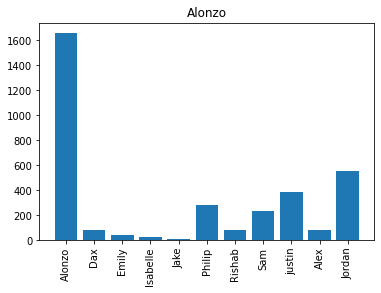

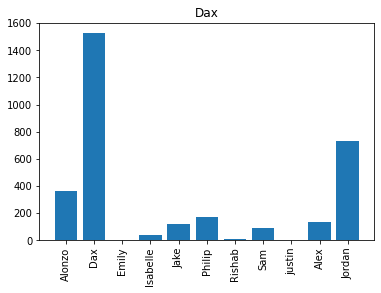

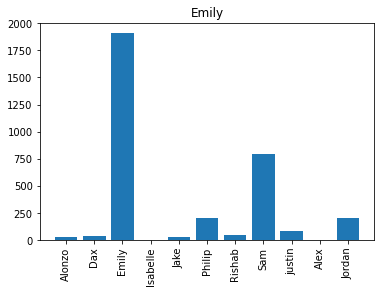

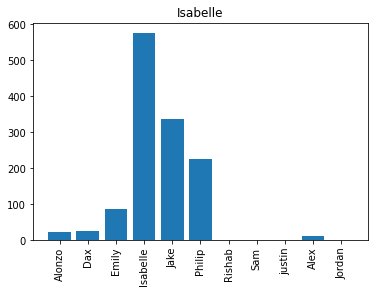

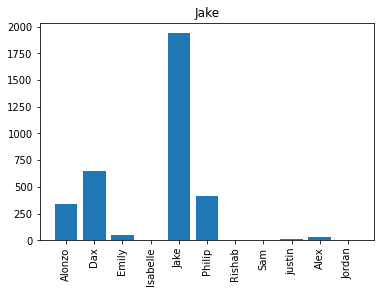

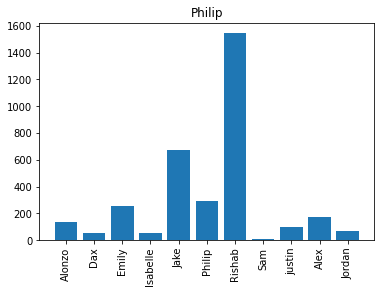

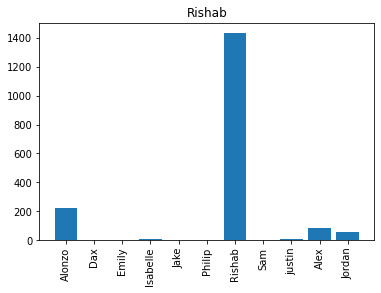

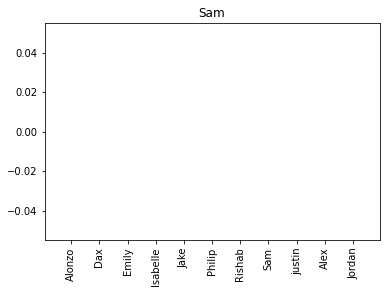

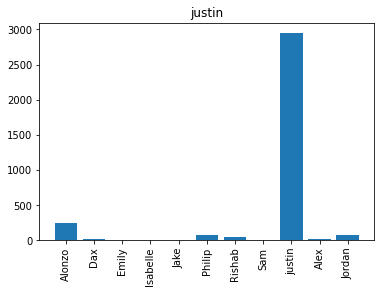

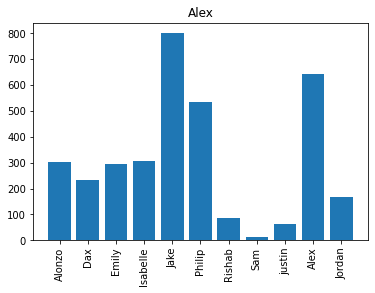

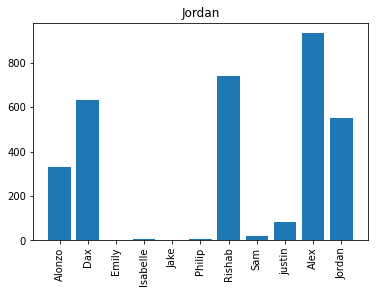

In [18]:
players = ['Alonzo', 'Dax', 'Emily', 'Isabelle', 'Jake', 'Philip', 'Rishab', 'Sam', 'justin', 'Alex', 'Jordan']

labels_limited = [[0 for _ in range(11)] for _ in range(11)]

for i in range(len(y_test_limited)):
    labels_limited[y_test_limited[i]][y_pred_limited[i]] += 1

    for i in range(11):
    plt.bar(students, labels_7[i])
    plt.xticks(rotation=90)
    plt.title(students[i])
    plt.show()